In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000717538"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000717538
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,ARROW FINANCIAL CORP
Ticker,AROW


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,51.0,1.331980e+01,1.993499e+00,10.61,11.33,12.97,14.7,17.92
interest income,63.0,1.963919e+07,2.520535e+06,15809000.00,17354500.00,19332000.00,21625000.0,26213000.00
net income,63.0,5.721889e+06,1.294591e+06,4059000.00,4852000.00,5415000.00,6337000.0,9730000.00
net interest income,63.0,1.501597e+07,2.834451e+06,11202000.00,12485500.00,14672000.00,16042500.0,21657000.00
provision for loan losses,63.0,3.469524e+05,2.168680e+05,0.00,188500.00,285000.00,451000.0,1157000.00


# Plots

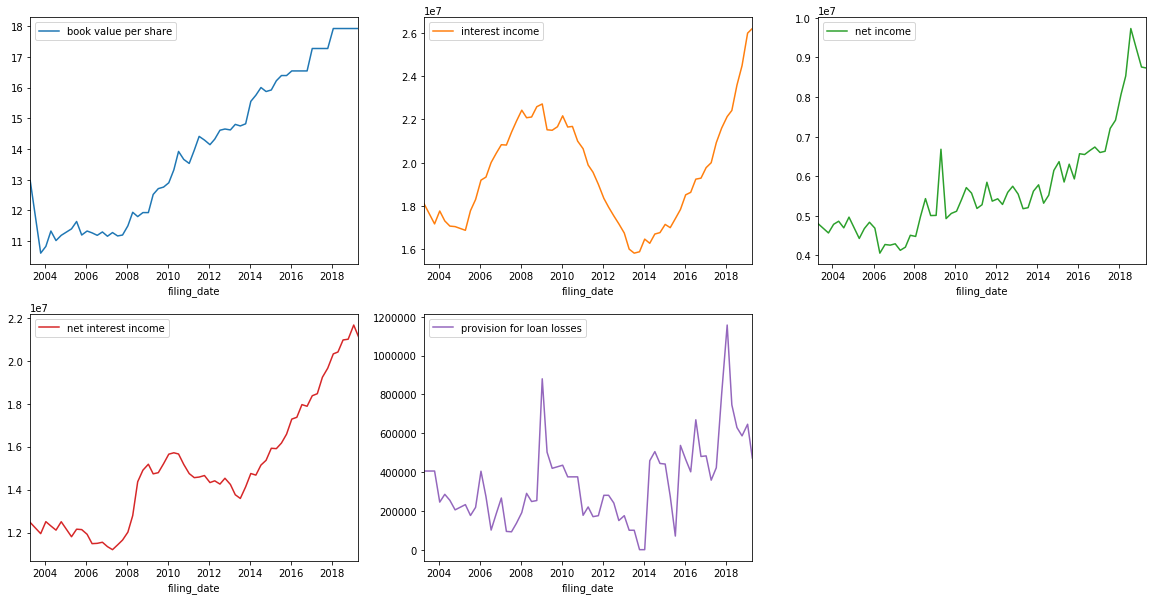

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                              
0000717538 book value per share                            2003Q2  missing   
           book value per share                            2004Q4  missing   
           book value per share                            2015Q3  missing   
           book value per share       2016Q1 to 2016Q3: 3 periods  missing   
           book value per share       2017Q1 to 2017Q3: 3 periods  missing   
           book value per share       2018Q1 to 2019Q1: 5 periods  missing   
           interest income                                 2003Q2  missing   
           interest income                                 2004Q4  missing   
           net income                                      2003Q2  missing   
           net income                                      2004Q4  missing   
           net interest income                             2003Q2  missing   
           net interest income                             2004Q4  missing   
           provision for loan losses                       2003Q2  missing   
           provision for loan losses                       2004Q4  missing   
           total revenue                                     None    empty   

                                                 message  
cik        item                                           
0000717538 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()